In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the plots are displayed within the Jupyter Notebook
%matplotlib inline

In [ ]:
# Connect to the SQLite database
db_path = '/content/combined_data.sqlite'
conn = sqlite3.connect(db_path)

In [ ]:
# Create a cursor object to interact with the database
cursor = conn.cursor()

In [ ]:
# Retrieve the list of tables in the database
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = cursor.execute(tables_query).fetchall()

In [ ]:
# Function to get the schema of a table
def get_table_schema(table_name):
    schema_query = f"PRAGMA table_info({table_name});"
    schema = cursor.execute(schema_query).fetchall()
    return schema

# Get the schema for each table
schemas = {table[0]: get_table_schema(table[0]) for table in tables}
print("Schemas:", schemas)

Schemas: {'merged_data': [(0, 'date', 'TIMESTAMP', 0, None, 0), (1, 'stock_end_of_day', 'REAL', 0, None, 0), (2, 'source', 'TEXT', 0, None, 0), (3, 'pits', 'TEXT', 0, None, 0), (4, 'debit_end_of_day', 'REAL', 0, None, 0)]}


In [ ]:
# Function to load a table into a pandas DataFrame
def load_table(table_name):
    query = f"SELECT * FROM {table_name};"
    df = pd.read_sql_query(query, conn)
    return df

# Load data from the 'merged_data' table
merged_data_df = load_table('merged_data')

# Display first few rows of the DataFrame
print("First few rows of merged_data_df:")
display(merged_data_df.head())

First few rows of merged_data_df:


,date,stock_end_of_day,source,pits,debit_end_of_day
0,2010-11-05 00:00:00,8681.776161,Storengy,Saline,24.655925
1,2010-11-06 00:00:00,8715.502723,Storengy,Saline,33.726562
2,2010-11-07 00:00:00,8748.544985,Storengy,Saline,33.042262
3,2010-11-11 00:00:00,8755.489683,Storengy,Saline,1.354762
4,2010-11-14 00:00:00,8849.702387,Storengy,Saline,31.954669


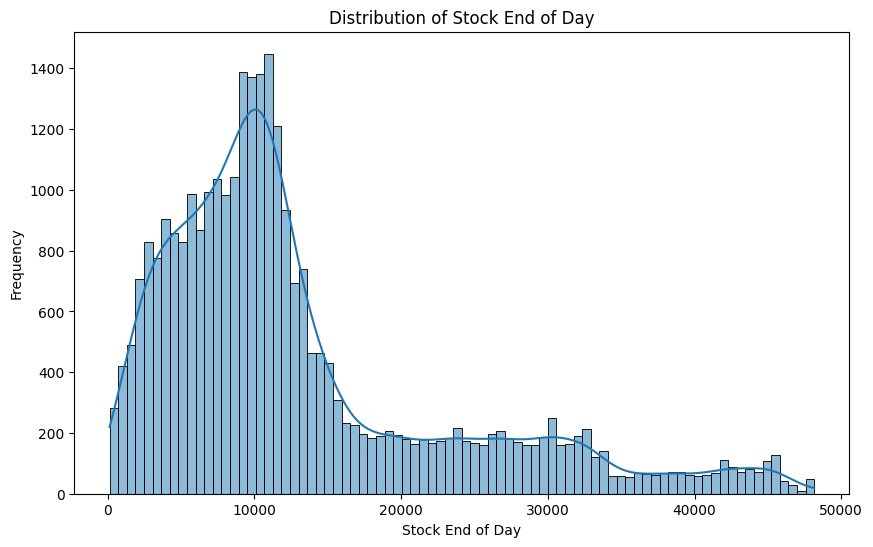

In [ ]:
# Plot distribution of 'stock_end_of_day'
plt.figure(figsize=(10, 6))
sns.histplot(merged_data_df['stock_end_of_day'], kde=True)
plt.title('Distribution of Stock End of Day')
plt.xlabel('Stock End of Day')
plt.ylabel('Frequency')
plt.show()

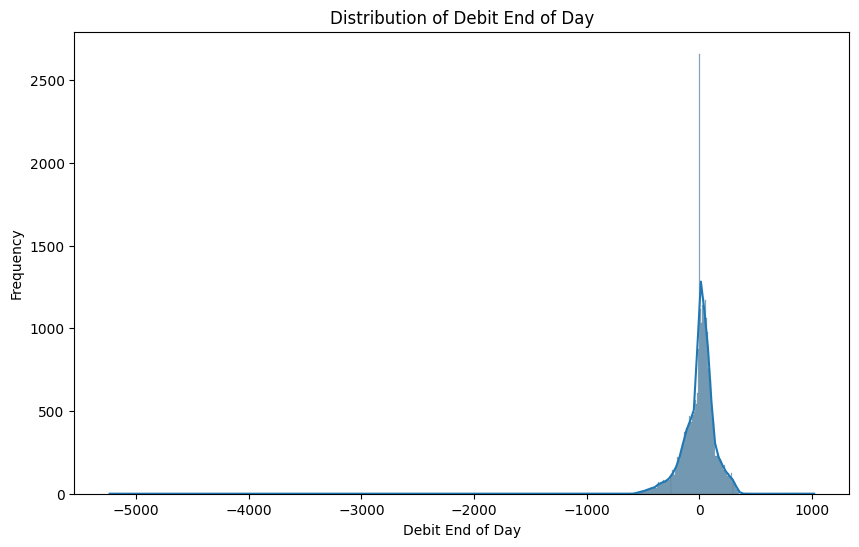

In [ ]:
# Plot distribution of 'debit_end_of_day'
plt.figure(figsize=(10, 6))
sns.histplot(merged_data_df['debit_end_of_day'], kde=True)
plt.title('Distribution of Debit End of Day')
plt.xlabel('Debit End of Day')
plt.ylabel('Frequency')
plt.show()

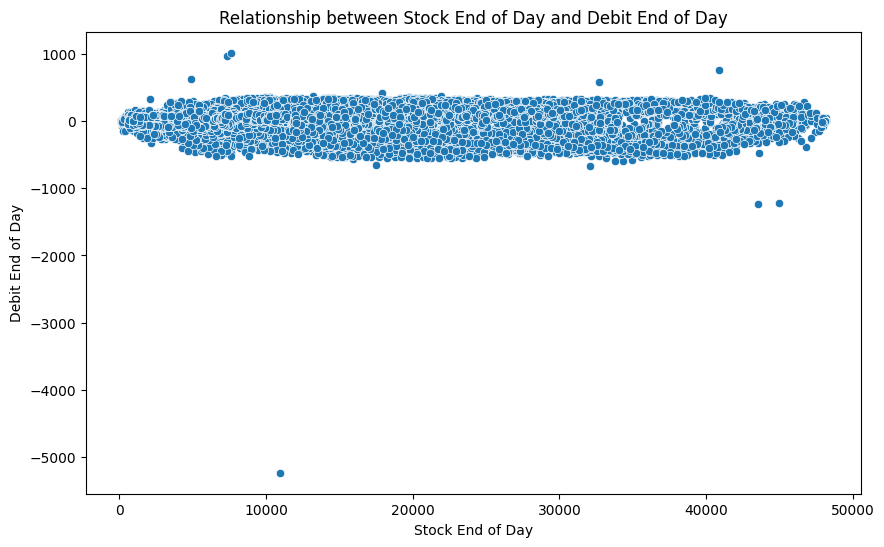

In [ ]:
# Plot relationship between 'stock_end_of_day' and 'debit_end_of_day'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='stock_end_of_day', y='debit_end_of_day', data=merged_data_df)
plt.title('Relationship between Stock End of Day and Debit End of Day')
plt.xlabel('Stock End of Day')
plt.ylabel('Debit End of Day')
plt.show()

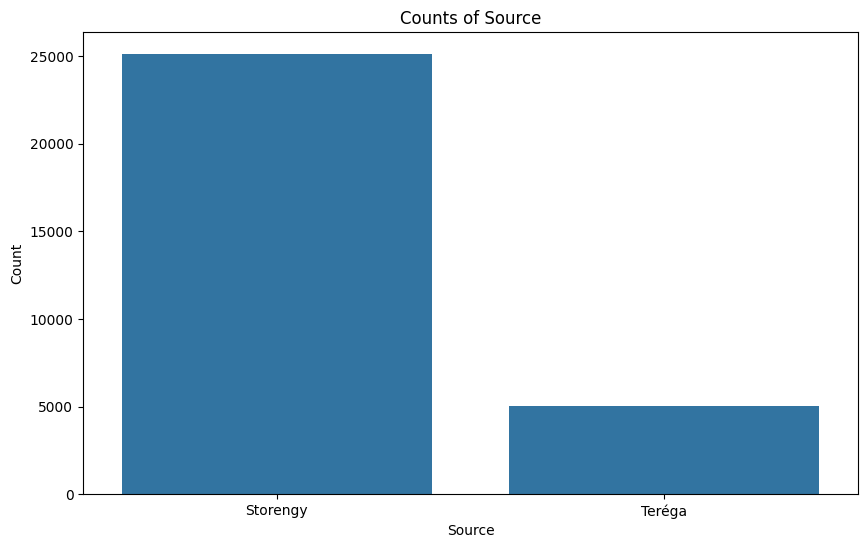

In [ ]:
# Plot counts of 'source'
plt.figure(figsize=(10, 6))
sns.countplot(x='source', data=merged_data_df)
plt.title('Counts of Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.show()

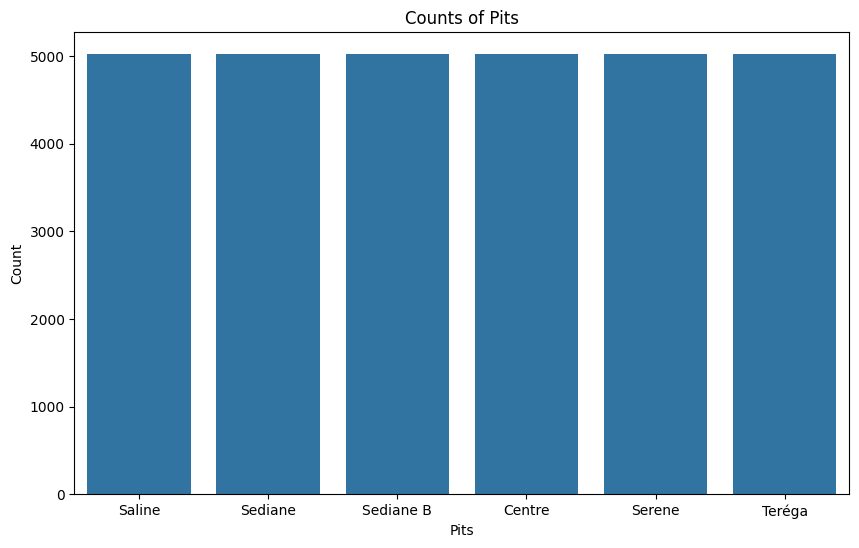

In [ ]:
# Plot counts of 'pits'
plt.figure(figsize=(10, 6))
sns.countplot(x='pits', data=merged_data_df)
plt.title('Counts of Pits')
plt.xlabel('Pits')
plt.ylabel('Count')
plt.show()

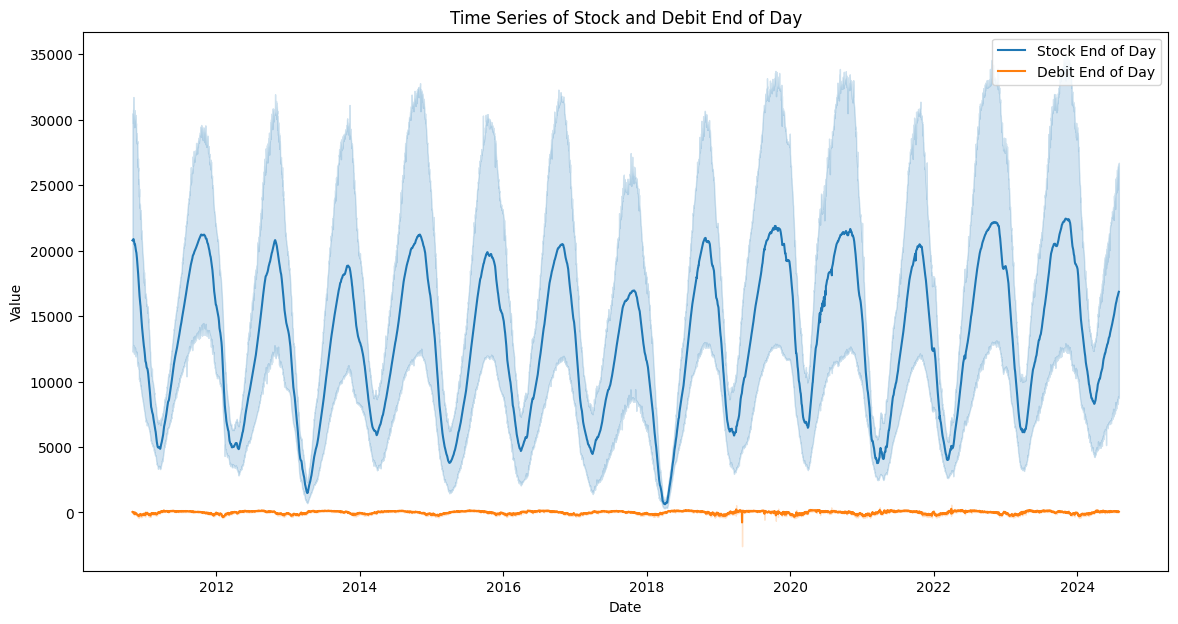

In [ ]:
# Convert 'date' to datetime
merged_data_df['date'] = pd.to_datetime(merged_data_df['date'])

# Time Series Plot of Stock and Debit Values
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='stock_end_of_day', data=merged_data_df, label='Stock End of Day')
sns.lineplot(x='date', y='debit_end_of_day', data=merged_data_df, label='Debit End of Day')
plt.title('Time Series of Stock and Debit End of Day')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

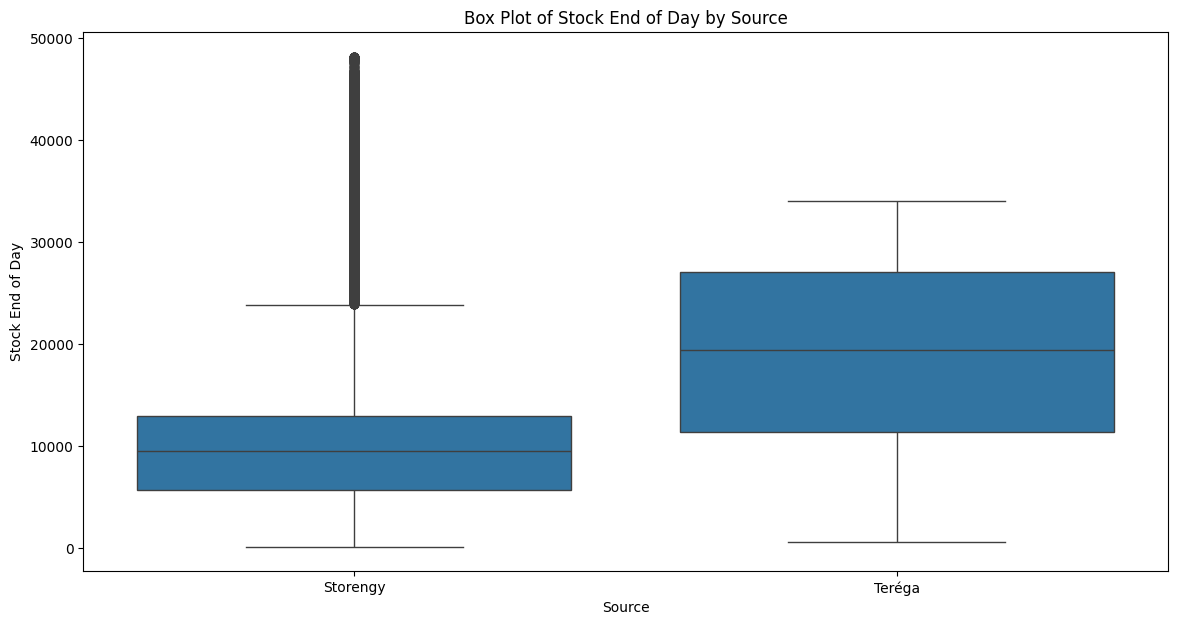

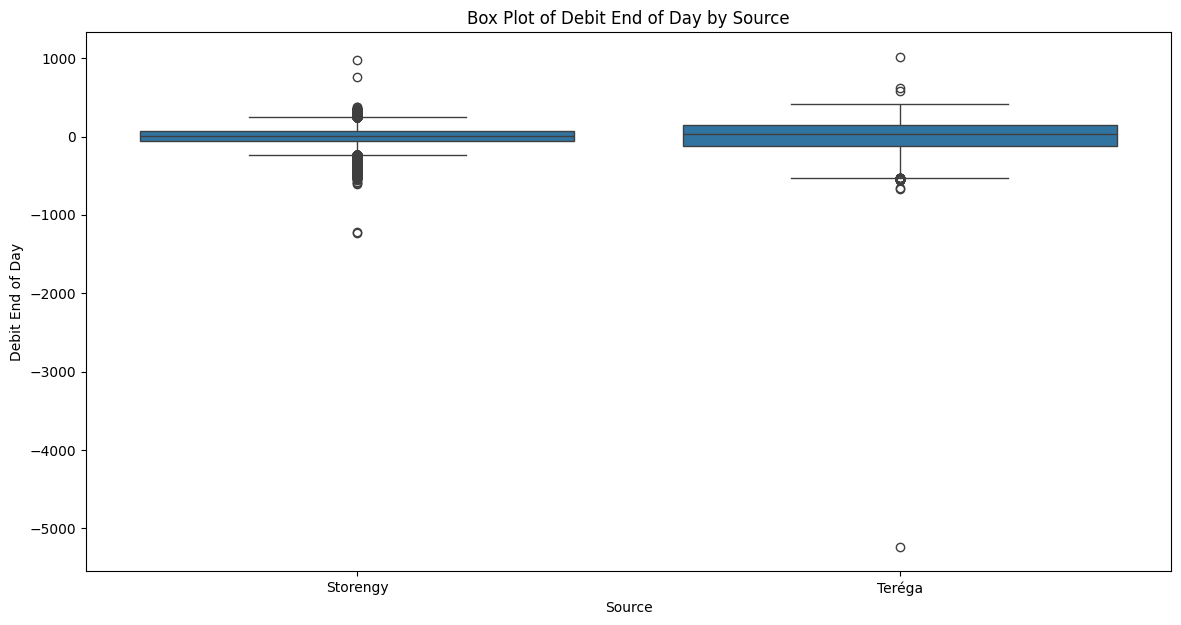

In [ ]:
# Box Plot of Stock and Debit Values by Source
plt.figure(figsize=(14, 7))
sns.boxplot(x='source', y='stock_end_of_day', data=merged_data_df)
plt.title('Box Plot of Stock End of Day by Source')
plt.xlabel('Source')
plt.ylabel('Stock End of Day')
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(x='source', y='debit_end_of_day', data=merged_data_df)
plt.title('Box Plot of Debit End of Day by Source')
plt.xlabel('Source')
plt.ylabel('Debit End of Day')
plt.show()

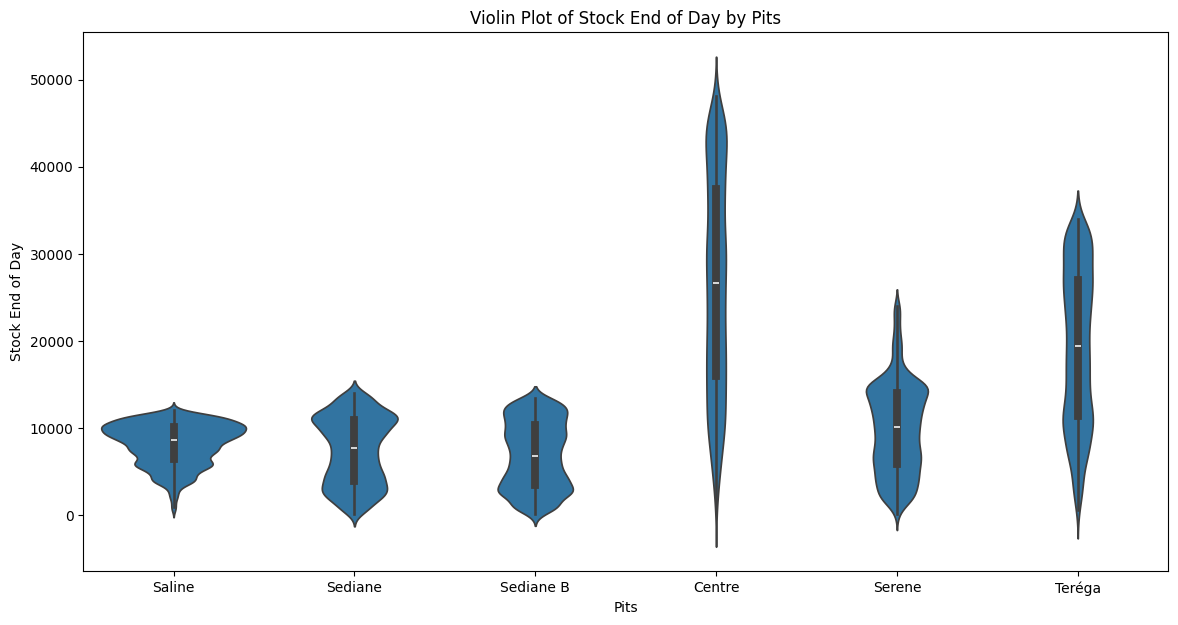

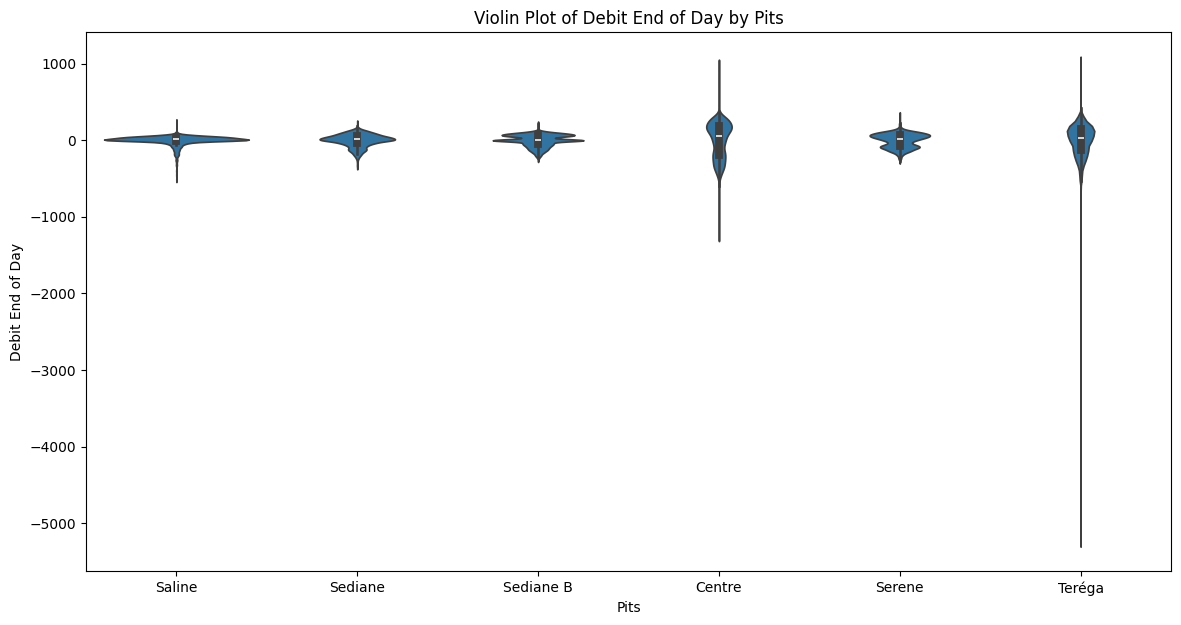

In [ ]:
# Violin Plot of Stock and Debit Values by Pits
plt.figure(figsize=(14, 7))
sns.violinplot(x='pits', y='stock_end_of_day', data=merged_data_df)
plt.title('Violin Plot of Stock End of Day by Pits')
plt.xlabel('Pits')
plt.ylabel('Stock End of Day')
plt.show()

plt.figure(figsize=(14, 7))
sns.violinplot(x='pits', y='debit_end_of_day', data=merged_data_df)
plt.title('Violin Plot of Debit End of Day by Pits')
plt.xlabel('Pits')
plt.ylabel('Debit End of Day')
plt.show()